## Course Information
DDS8555 - Predictive Analysis<br>
Assignment 1<br>
Evaluate Regression and Classifier Metrics.

By - Samuel Mbah Nde
Due Date and Time: Sunday January 26th 2024 at 11:59PM PST.

# Introduction to the Iris Dataset

The **Iris dataset** is a classic dataset in the field of machine learning and statistics. It was introduced by the British statistician and biologist **Ronald Fisher** in 1936 as part of his paper on discriminant analysis. This dataset is widely used for learning and experimenting with classification and regression techniques.

## Key Characteristics of the Dataset
- **Domain**: Botany
- **Task Type**: Classification and Regression
- **Number of Samples**: 150
- **Number of Features**: 4
- **Target Classes**: 3
  - Setosa
  - Versicolor
  - Virginica

### Features (Independent Variables)
1. **Sepal Length (cm)**: Length of the sepal in centimeters.
2. **Sepal Width (cm)**: Width of the sepal in centimeters.
3. **Petal Length (cm)**: Length of the petal in centimeters.
4. **Petal Width (cm)**: Width of the petal in centimeters.

### Target Variable (Dependent Variable)
- **Species**: The species of iris, which is one of the three classes:
  - `Iris-setosa`
  - `Iris-versicolor`
  - `Iris-virginica`

## Why is the Iris Dataset Popular?
- **Simplicity**: It is small, easy to understand, and clean, making it an ideal first dataset for exploring machine learning techniques.
- **Balanced Classes**: The dataset has 50 samples for each class, making it well-suited for classification tasks.
- **High Separability**: Two classes (`Setosa` and `Versicolor`) are linearly separable, which is useful for demonstrating classification algorithms.

## Applications of the Iris Dataset
The Iris dataset is commonly used for:
1. **Classification**: Predicting the species of an iris flower based on its measurements.
2. **Regression**: Estimating continuous variables such as petal length or width using the other features.
3. **Data Visualization**: Exploring relationships


## Import the packages needed to load and analyze the data set
I will load all the packages needed in one place to keep my code organized.

In [4]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import probplot
import re, os, json, requests, random
from datetime import datetime, timedelta, timezone
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
from sklearn import datasets

## Set seed to ensure work is reproducible.

In [6]:
random.seed(6222)

## Load the data into pandas dataframes

In [8]:
iris_data_object = datasets.load_iris()
iris= pd.DataFrame(iris_data_object.data) 

iris.columns = iris_data_object.feature_names 

iris['type'] = iris_data_object.target 

iris['type']=iris['type'].astype('object') 

iris 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Rename Columns
Column names in the loaded data contain spaces which make them difficult to manipulate with dot notation.

From visually inspecting the column names, I see that there is a trend that can be used to reginerate new column names by removing white spaces and special characters and converting the words into title case.

In [10]:
def rename_iris_column(column_name: str):
    words_in_column_name = re.findall(r'\w+', column_name)
    return ''.join([word.title() if word.lower() != 'cm' else '_cm' for word in words_in_column_name])

iris.columns = [rename_iris_column(column_name) for column_name in iris.columns]

iris.head()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
iris.describe()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,New
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,20.553604
std,0.828066,0.435866,1.765298,0.762238,29.922686
min,4.300000,2.000000,1.000000,0.100000,1.261500
25%,5.100000,2.800000,1.600000,0.300000,1.938853
50%,5.800000,3.000000,4.350000,1.300000,2.970235
75%,6.400000,3.300000,5.100000,1.800000,42.302941
max,7.900000,4.400000,6.900000,2.500000,142.133333


In [51]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SepalLength_cm  150 non-null    float64
 1   SepalWidth_cm   150 non-null    float64
 2   PetalLength_cm  150 non-null    float64
 3   PetalWidth_cm   150 non-null    float64
 4   Type            150 non-null    object 
 5   New             150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


## Creating a `New` column.

Below, I create a new feature `'New'` by multiplying sepal length by sepal width and dividing by petal length * petal width. 

In [12]:
#iris['New']=(iris.iloc[:,0]*iris.iloc[:,1])/(iris.iloc[:,2]*iris.iloc[:,3]) 
def calculate_new_value(row):
    return row['SepalLength_cm'] * row['SepalWidth_cm']/(row['PetalLength_cm']*row['PetalWidth_cm'])
iris['New']=iris.apply(lambda row_dict: calculate_new_value(row_dict), axis = 1 ) 
iris

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Type,New
0,5.1,3.5,1.4,0.2,0,63.750000
1,4.9,3.0,1.4,0.2,0,52.500000
2,4.7,3.2,1.3,0.2,0,57.846154
3,4.6,3.1,1.5,0.2,0,47.533333
4,5.0,3.6,1.4,0.2,0,64.285714
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1.680602
146,6.3,2.5,5.0,1.9,2,1.657895
147,6.5,3.0,5.2,2.0,2,1.875000
148,6.2,3.4,5.4,2.3,2,1.697262


## Divide the dataset into training and test sets.
Sample 80% of the data for a training set stratifying on the `'Type'` column.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,0:4], iris.iloc[:,4], test_size=0.2, random_state=42, stratify=iris.Type)

## Compute and Print Mean Errors.
I design a function to compute these errors and then I print them to the console.

In [16]:
def compute_and_print_mean_errors(y,yhat, title=None): 
    ME=np.round(np.mean(y-yhat),3) 
    MPE=np.round(np.mean((y-yhat)/y),3) 
    myMAE=np.round(mean_absolute_error(y,yhat),3) 
    myMSE=np.round(mean_squared_error(y,yhat),3) 
    myMAPE=np.round(mean_absolute_percentage_error(y,yhat),3)
    if title:
        l = len(title) + 1
        print(f'\n{title}')
        print('-'*l)
    print("\n","ME:", np.round(ME,3),"\n","MPE:",MPE,"\n", "MAE:",  myMAE,"\n", "MSE:", myMSE,"\n","MAPE:",myMAPE)
    return [ME, MPE, myMAE, myMSE, myMAPE]

On the test set, evaluate the following two estimators for sepal width using ME, MPE, MAPE, MAE, and  MSE. 
Mean of petal length calculated only on the training data.
Mean of sepal length minus petal width calculated only on the training data.

In [18]:
mean_train_petal_length=np.mean(X_train['PetalLength_cm']) 
mean_train_diff_sepal_length_and_petal_width=np.mean(X_train['SepalLength_cm']-X_train['PetalWidth_cm']) 
est1=[mean_train_petal_length]*len(y_test) 
est2=[mean_train_diff_sepal_length_and_petal_width]*len(y_test) 
model1_averages = compute_and_print_mean_errors(X_test['SepalWidth_cm'],est1, 'Mean Errors for using mean training petal length vs test sepal widths.') 

model2_averages = compute_and_print_mean_errors(X_test['SepalWidth_cm'],est2, 'Mean Errors for using mean diff in training sepal length vs sepal width.') 


Mean Errors for using mean training petal length vs test sepal widths.
-----------------------------------------------------------------------

 ME: -0.677 
 MPE: -0.237 
 MAE: 0.694 
 MSE: 0.602 
 MAPE: 0.242

Mean Errors for using mean diff in training sepal length vs sepal width.
-------------------------------------------------------------------------

 ME: -1.543 
 MPE: -0.522 
 MAE: 1.543 
 MSE: 2.526 
 MAPE: 0.522


In [19]:
est1[0], est2[0]

(3.77, 4.636666666666667)

## Evaluating Multiple Classifiers

On the test set, evaluate the two classifiers (built on the training set) below for `'Type'` using `accuracy`, `precision`, `recall`, and the `F1 score`.  

- Up to 1st quantile of sepal length = type 0, >1st up to 2nd quantile = type 1, >2nd quantile = type 2.

- Up to 2d quantile of sepal length = type 0, >2nd up to 3rd quantile = type 1, >3rd quantile = type 2.

In [21]:
quartiles123=np.percentile(X_train['SepalLength_cm'], [25, 50, 75]) 

y_hat=np.zeros(len(y_test)) 

y_hat[X_test['SepalLength_cm']>quartiles123[0]]=1 

y_hat[X_test['SepalLength_cm']>quartiles123[1]]=2 

y_hat=y_hat.astype('int') 

print(classification_report(y_test.astype('int'),y_hat)) 

 
y_hat2=np.zeros(len(y_test)) 

y_hat2[X_test['SepalLength_cm']>quartiles123[1]]=1 

y_hat2[X_test['SepalLength_cm']>quartiles123[2]]=2 

y_hat2=y_hat2.astype('int') 

print(classification_report(y_test.astype('int'),y_hat2)) 

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.33      0.20      0.25        10
           2       0.59      1.00      0.74        10

    accuracy                           0.57        30
   macro avg       0.55      0.57      0.53        30
weighted avg       0.55      0.57      0.53        30

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.38      0.30      0.33        10
           2       0.67      0.60      0.63        10

    accuracy                           0.60        30
   macro avg       0.58      0.60      0.58        30
weighted avg       0.58      0.60      0.58        30



## Observations and learnings from Regression Models
Both regression models use a constant value computed from the training set as the predicted value for every record in the test set. 

For the first model, the average `PetalLength_cm` in the training dataset was used as the predictor of `SepalWidth_cm`.
For the second model, the average of the difference between `SepalLength_cm` and `PetalLength_cm` in the training dataset was used as the predictor of `SepalWidth_cm`.

| Model | Predicted Value | Description |
|---|---| ---|
| Model1 |3.77 | Uses mean petal length|
| Model2 | 4.63637 | Uses mean difference between `SepalLength_cm` and `PetalLength_cm`|

Below, I summarize the results.

### Overall
    - Model 1 outperformed model 2 in all metrics.
    - To investigate this, I will plot S


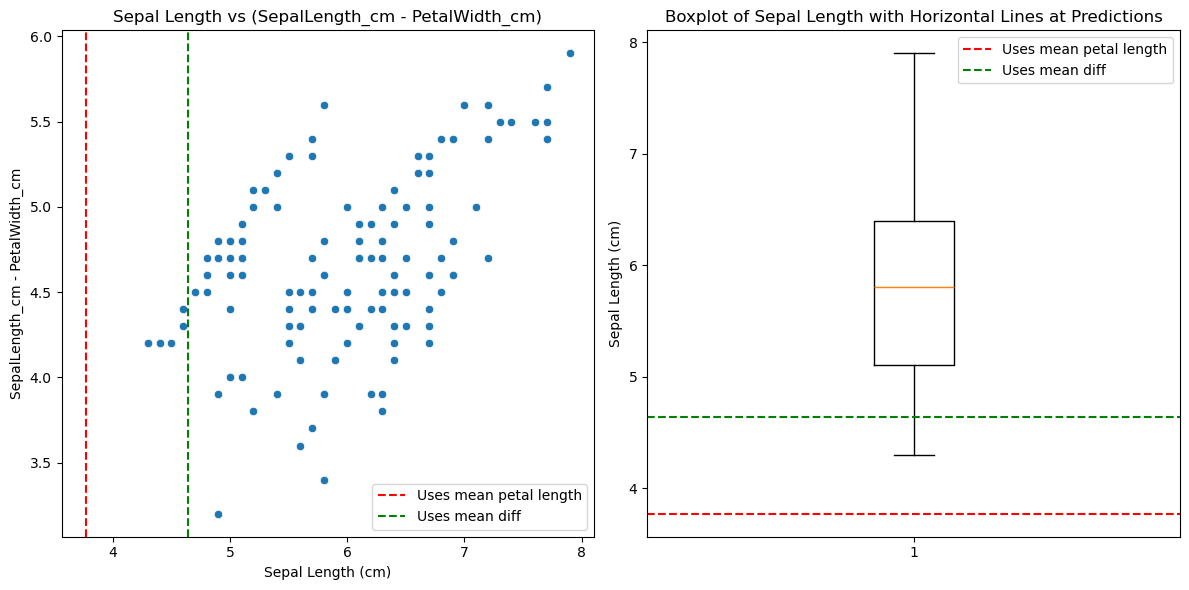

In [23]:
# Create a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create the scatterplot on the first subplot
sns.scatterplot(x=iris['SepalLength_cm'], y=iris['SepalLength_cm']-iris['PetalWidth_cm'], data=iris, ax=axes[0])

# Add vertical lines to the scatterplot
axes[0].axvline(x=3.77, color='red', linestyle='--', label='Uses mean petal length')
axes[0].axvline(x=4.64, color='green', linestyle='--', label='Uses mean diff')

# Add labels and title for the scatterplot
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('SepalLength_cm - PetalWidth_cm')
axes[0].set_title('Sepal Length vs (SepalLength_cm - PetalWidth_cm)')

# Add legend to the scatterplot
axes[0].legend()

# Create the boxplot on the second subplot
axes[1].boxplot(iris.SepalLength_cm)

# Add horizontal lines to the boxplot
axes[1].axhline(y=3.77, color='r', linestyle='--', label='Uses mean petal length')
axes[1].axhline(y=4.64, color='g', linestyle='--', label='Uses mean diff')

# Add labels and title for the boxplot
axes[1].set_ylabel('Sepal Length (cm)')
axes[1].set_title('Boxplot of Sepal Length with Horizontal Lines at Predictions')

# Add legend to the boxplot
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Observation from plots

- Both models are underfits for the dataset.
- Using Mean petal lenght is worst than using mean difference in `SepalLength_cm - PetalWidth_cm` as an estimator of Sepal Length. This is because the average `PetalWidth_cm` is lower than the minimum value of `SepalLength_cm`.


These observation confirm to us why using using the mean difference in `SepalLength_cm - PetalWidth_cm` would be the better predictor.

## Observations and learnings from Classification Models
Both classification models use random assignment of values based on the rank (percentile) that each row appears in the dataset to assign a class to it. 

Summary of the classifiers.
The classifiers used in this analysis were defined based on the quarter (from quartile) in which the sepal length lies.

The table below summarizes how the predicted value from each model based on the quarter in which the input record (sepal length) lies.

| Model | 1st Quarter | 2nd Quarter | 3rd Quarter | 4th Quarter |
|---|---|---|---|---|
| Model1 | 0 | 1 | 2 | 2 |
| Model2 | 0 | 0 | 1 | 2 |

Below, I summarize the results.

### Overall
    - The support for each class is the same which makes sense because we had a stratified sample from an evenly distributed column `Type`.
    - The average of all the metrics is better for the second model than for the first.
    - The metrics are better for classes 0 and 2 than for class 2.


## Investigate why the Second model was better than the first model.
As seen in the classification report above, the second model was more performant than the first one. Below, I first plot the data to see if they are obvious reasons and then dig dipper with a box plot.

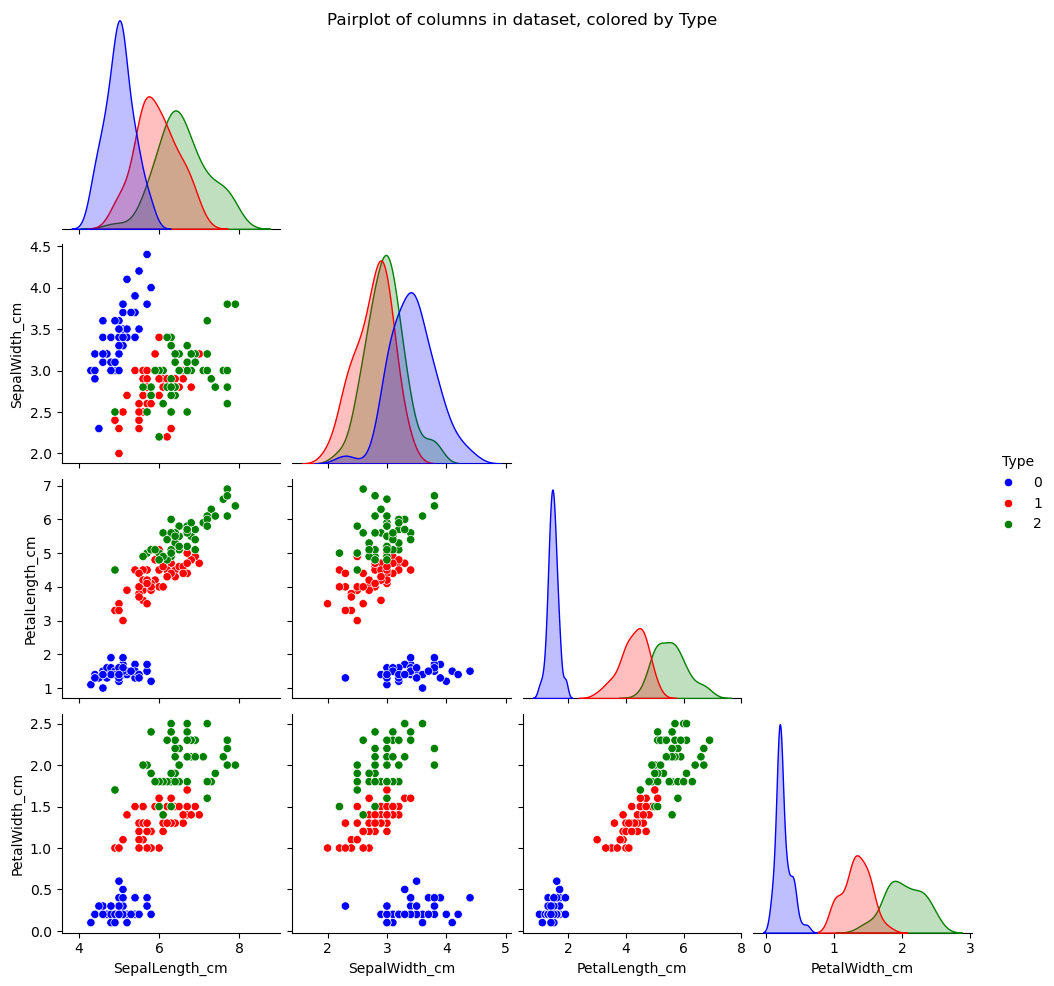

In [28]:
colors = [
    "blue",
    "red",
    "green",
    "gray",
    "orange",
    "purple",
    "brown",
    "pink",
    "cyan",
    "magenta"
]

g = sns.pairplot(iris.drop('New', axis=1), corner=True, diag_kind='kde', hue='Type', palette=colors[:iris.Type.nunique()])
# Set the title of the plot
g.fig.suptitle("Pairplot of columns in dataset, colored by Type")

plt.show()


## Observations from Pairplot.

The pairplot shows that flowers of `Type == 0` generally have different properties than the flowers of types 1 and 2 which generally have similar features. And in particular, this relationship holds true for `SepalLength_cm`.

To investigate this furture, I will plot a boxplot of `SepalLength_cm` to see if this overlap in values for `Type` in [`1, 2]` exists.

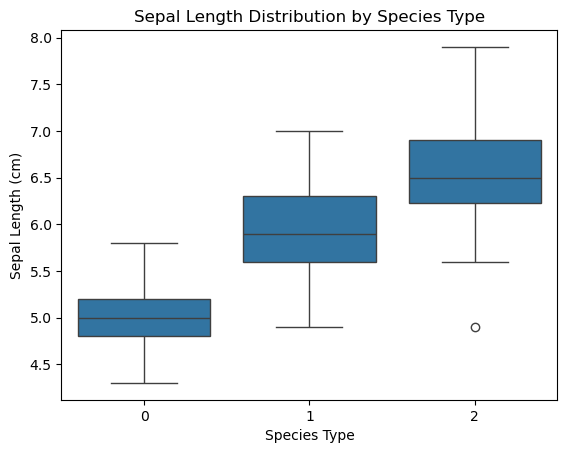

In [30]:
# Create the boxplot using seaborn
sns.boxplot(x='Type', y='SepalLength_cm', data=iris)

# Customize the plot (optional)
plt.title('Sepal Length Distribution by Species Type')
plt.xlabel('Species Type')
plt.ylabel('Sepal Length (cm)')

# Show the plot
plt.show()

## Observations from Boxplots.
The pairplots show that there is overlap between species of Type 1 and Type 2.

This means that any model that predicts similar values Type 1 and Type 2 would likely yield more accurate values.

Also, since the values of Type 0 are distinct from the other 2 types, predicting similar values for Type 1 and any other type would likely result in less accurate predictions.